In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.gridspec as gridspec

import scanpy as sc
sc.settings.set_figure_params(vector_friendly=True)
import squidpy as sq

In [3]:
font_size = 6
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size, 'legend.fontsize':font_size, 
    'scatter.marker': 'o',
    'legend.markerscale': 0.8, 
    'legend.loc': 'center right',
    'legend.borderpad':0,
    'legend.columnspacing': 0.5,
    'legend.labelspacing': 0.2,
    'legend.handletextpad': 0,
    'legend.borderaxespad': 0,
    'legend.handleheight': 0.5,
    'legend.handlelength': 1.0,
}
sns.set(style='ticks',rc=rc) #talk, ticks, paper
sns.set_context("paper")

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

centimeter = 1/2.54  # centimeter in inches

In [3]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
       

In [4]:
import scanpy as sc
adata = sc.read_h5ad('../../result/cci/MB/adata_mouse_brain.h5ad')
adata

AnnData object with n_obs × n_vars = 5150 × 24038
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters', 'spot_neighbors'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'domain_lr_means', 'metrics', 'pca', 'spatial_neighbors'
    obsm: 'X_pca', 'cell_types', 'spatial', 'spot_lr_padj', 'spot_lr_score'
    varm: 'PCs'
    layers: 'count'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [15]:
adata.obsm['cell_types']

cell_name
100-17    1.0
100-18    1.0
100-19    1.0
100-20    1.0
100-21    1.0
         ... 
99-73     1.0
99-74     1.0
99-75     1.0
99-76     1.0
99-77     1.0
Length: 5150, dtype: float64

# Entropy   spatial heatmap

In [5]:
from scipy.stats import entropy

In [6]:
spot_hetero = np.ones(len(adata.obs_names))
ct_frac = adata.obsm['cell_types'].values  # 0-1 range
spot_hetero = entropy(ct_frac, base=2, axis=1)
spot_hetero[np.isnan(spot_hetero)]=0

In [7]:
adata.obs['spot_hetero'] = spot_hetero

In [8]:
import matplotlib.transforms as mtransforms

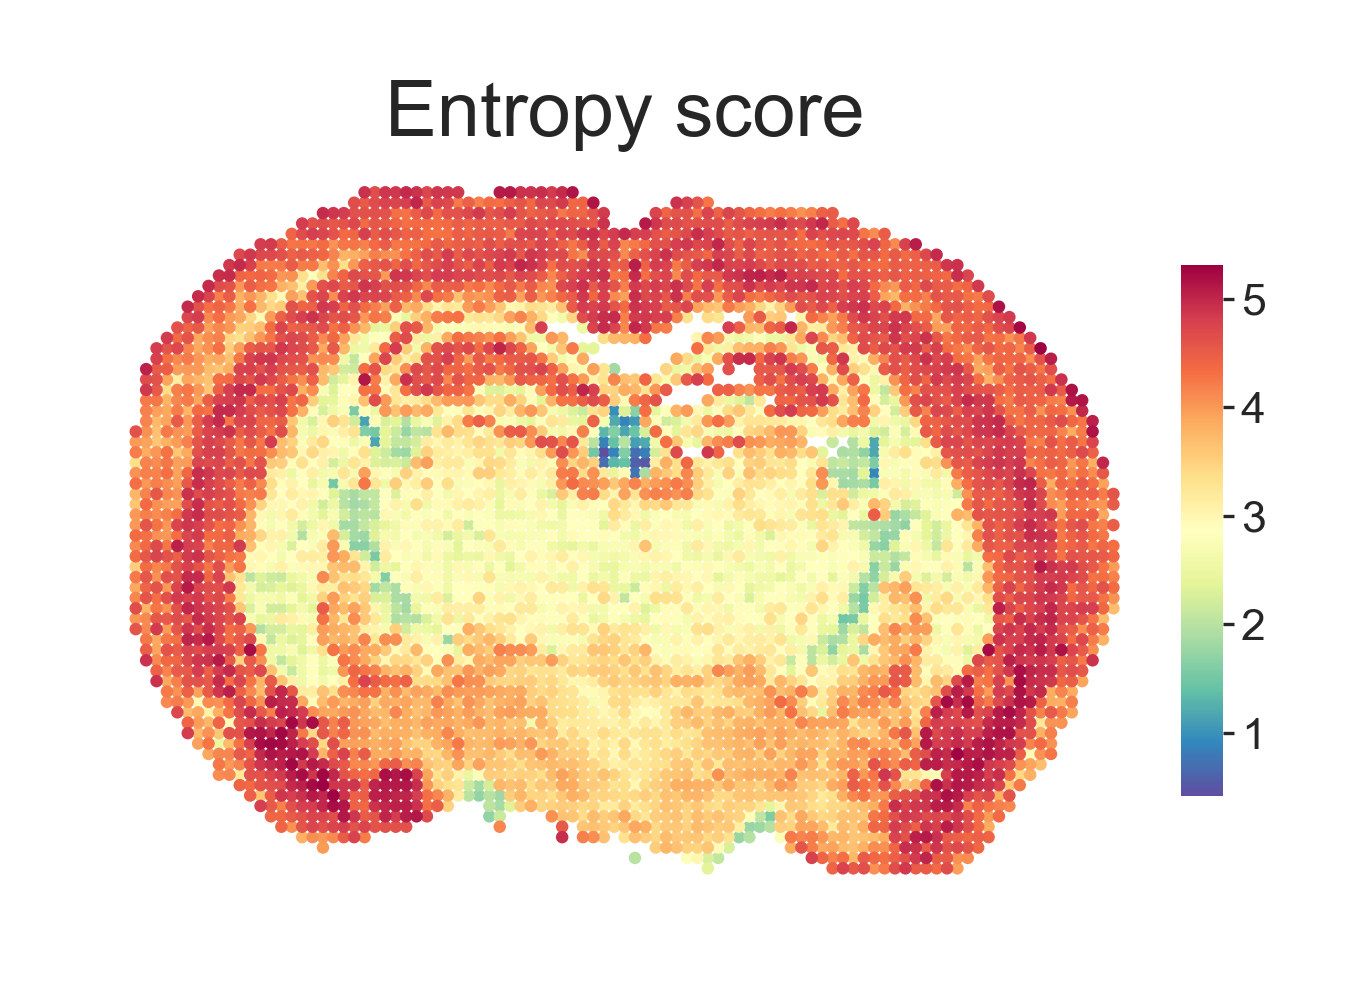

In [9]:
fig=plt.figure(figsize=(3.8*centimeter, 3*centimeter), dpi=400)
ax_d1 = plt.subplot(aspect = 'equal')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plot = sc.pl.spatial(adata, color='spot_hetero', spot_size=1.2, frameon=False, ax=ax_d1, 
              cmap='Spectral_r', show=False)
ax_d1.set_title('Entropy score', pad=0, fontsize=7)
# ax_d1.tick_params(labelsize=3)

# cbar_ax = fig.get_axes()[-1]
# cbar_ax.remove()
ax_d1.figure.get_axes()[-1].remove()

# colorbar cax
cax = ax_d1.figure.add_axes(mtransforms.Bbox.from_extents(ax_d1.get_position().x1 + 0.01,
                              ax_d1.get_position().y0+0.12,
                              ax_d1.get_position().x1 + 0.01 + 0.035,
                              ax_d1.get_position().y1-0.12), )# facecolor='none'
plt.colorbar(plot[0].collections[0], cax=cax, orientation='vertical', ticks=[0, 1, 2, 3, 4, 5])
cax.tick_params(direction='out', labelsize=4, length=1, width=0.3, pad=0.6)
cax.set_frame_on(False)

ax_d1.margins(0,0)
plt.savefig('Fig5_entropy_score.pdf', bbox_inches='tight', format='pdf', dpi=400)

# max cell type

In [10]:
max_CT = pd.read_csv('../../result/cci/MB/Mouse_brain_max_celltype_score.csv', index_col=0)
adata.obs['max_CT'] = max_CT

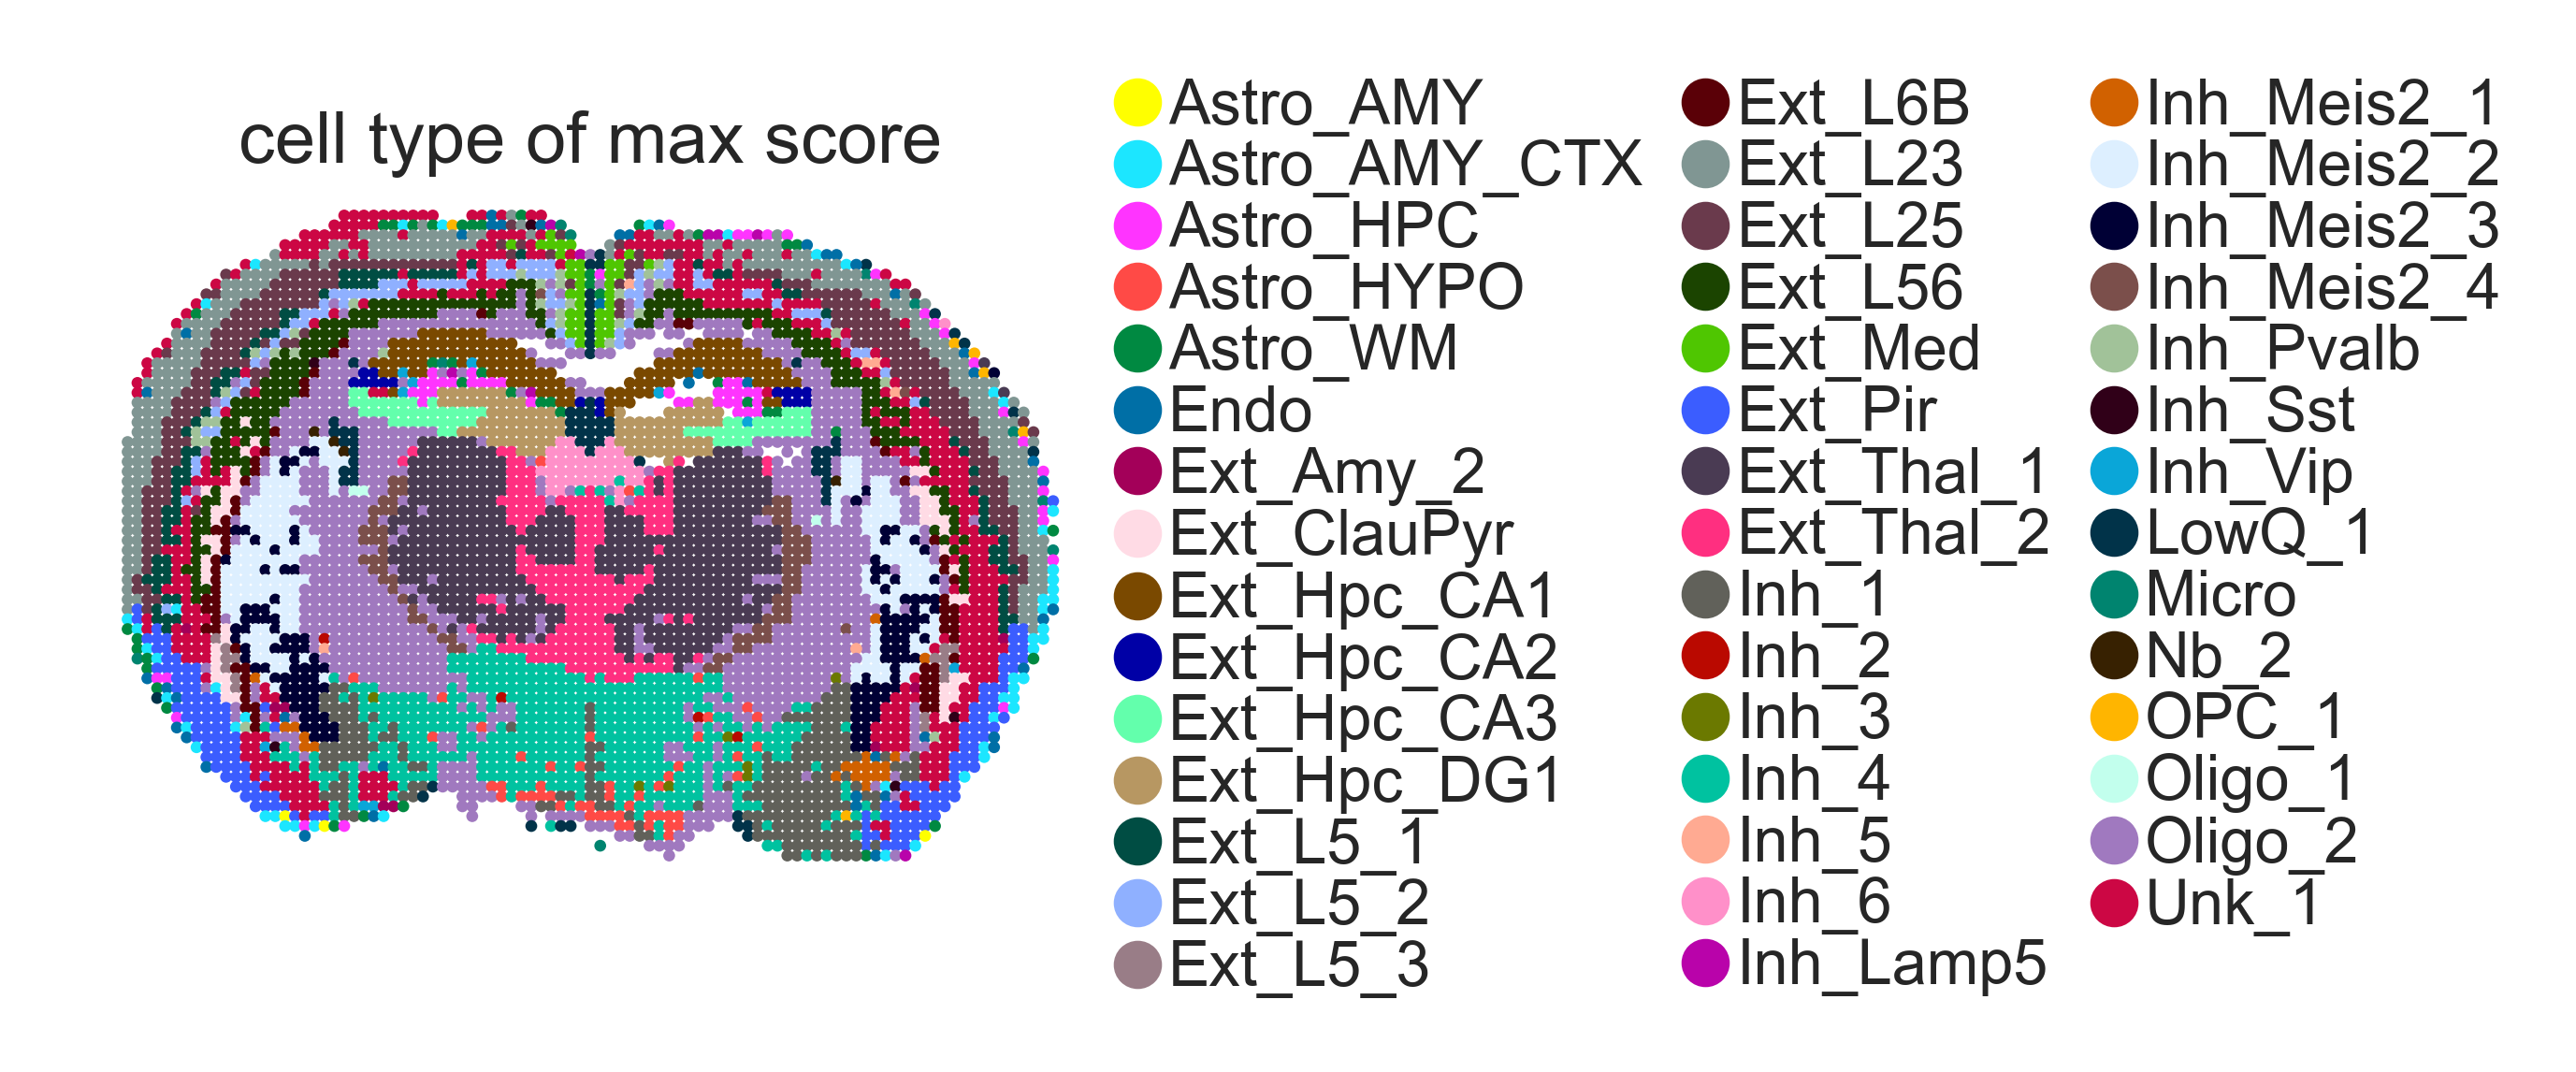

In [11]:
fig = plt.figure(figsize=(3.5*centimeter, 3*centimeter), dpi=400)
ax_d2 = plt.subplot(aspect = 'equal')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
sc.pl.spatial(adata, color='max_CT', spot_size=1.2, frameon=False,
              ax=ax_d2, show=False)
ax_d2.set_title('cell type of max score', pad=0, fontsize=7)
ax_d2.legend(loc='center left', bbox_to_anchor=[1, 0.5], ncol=3, 
             frameon=False, fontsize=6, 
             markerscale=0.8, labelspacing=0, handleheight=1.0, handlelength=1.0,)
ax_d2.margins(0,0)
plt.savefig('Fig5_cell2location_max_score.pdf', bbox_inches='tight', format='pdf', dpi=400)

/media/bgi/liukeyin/.conda/envs/squidpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/media/bgi/liukeyin/.conda/envs/squidpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


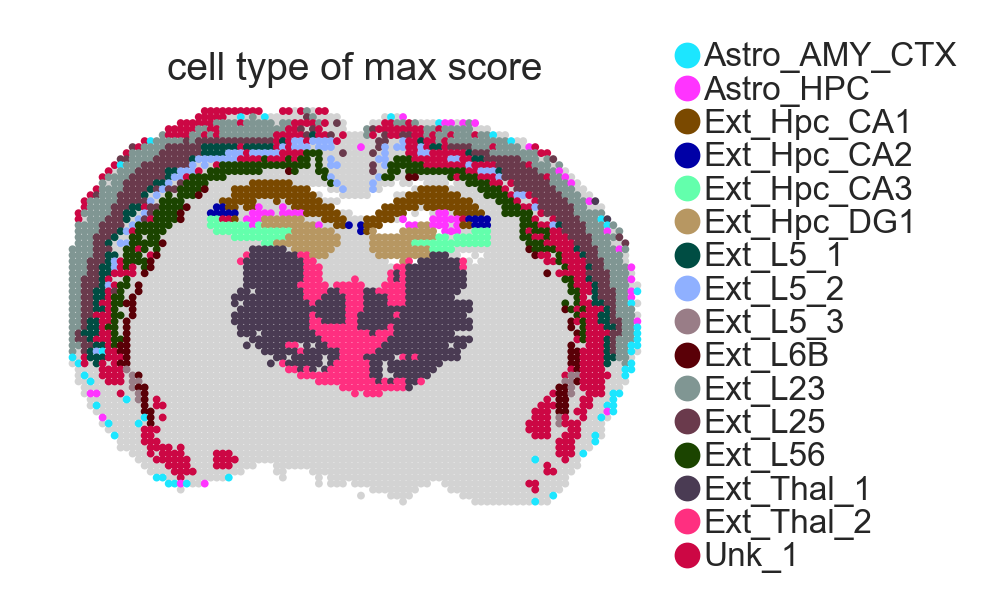

In [11]:
fig = plt.figure(figsize=(4*centimeter, 3*centimeter), dpi=400)
ax_d2 = plt.subplot(aspect = 'equal')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
sc.pl.spatial(adata, color='max_CT', spot_size=1.3, frameon=False, 
              groups=[
                      'Ext_Hpc_CA1', 'Ext_Hpc_CA2', 'Ext_Hpc_CA3', 'Ext_Hpc_DG1', 'Astro_HPC', 
                      'Ext_L23', 'Ext_L25', 'Ext_L56', 'Ext_L5_1', 'Ext_L5_2', 'Ext_L5_3', 'Ext_L6B',
                      'Unk_1', 'Astro_AMY_CTX',
                      'Ext_Thal_1', 'Ext_Thal_2'
                     ],
              ax=ax_d2, show=False, na_in_legend=False)
ax_d2.set_title('cell type of max score', pad=0, fontsize=7)
ax_d2.legend(loc='center left', bbox_to_anchor=[1, 0.5], ncol=1, 
             frameon=False, fontsize=6, 
             markerscale=0.8, labelspacing=0, handleheight=1.0, handlelength=1.0,)
ax_d2.margins(0,0)
# plt.savefig('Fig6S_1.pdf', bbox_inches='tight', format='pdf', dpi=400)

# cell type correlation

In [11]:
import scipy.stats

In [12]:
adata.obsm['cell_types'].values.shape

(5150, 59)

In [13]:
spot_CT = adata.obsm['cell_types'].values
# n_spot = spot_CT.shape[0]
n_CT = spot_CT.shape[1]
Corr_CT_CT = np.zeros((n_CT,n_CT))
pval_CT_CT = np.zeros((n_CT,n_CT))
for i in range(n_CT):
    for j in range(n_CT):
        Corr_CT_CT[i,j], pval_CT_CT[i,j] = scipy.stats.spearmanr(spot_CT[:,i], spot_CT[:,j])

In [14]:
Corr_CT_CT.shape

(59, 59)

In [15]:
df_Corr_CT2 = pd.DataFrame(Corr_CT_CT, 
                           columns=adata.obsm['cell_types'].columns, 
                           index=adata.obsm['cell_types'].columns)

In [16]:
df_Corr_CT2

Astro_AMY  Astro_AMY_CTX  Astro_CTX  Astro_HPC  Astro_HYPO  \
Astro_AMY        1.000000       0.964926   0.835899   0.872224   -0.307621   
Astro_AMY_CTX    0.964926       1.000000   0.911166   0.900666   -0.457205   
Astro_CTX        0.835899       0.911166   1.000000   0.804517   -0.600731   
Astro_HPC        0.872224       0.900666   0.804517   1.000000   -0.462736   
Astro_HYPO      -0.307621      -0.457205  -0.600731  -0.462736    1.000000   
Astro_STR        0.829970       0.874749   0.790605   0.949494   -0.525933   
Astro_THAL_hab   0.067261      -0.110306  -0.353945  -0.050147    0.772525   
Astro_THAL_lat  -0.288091      -0.304384  -0.206584  -0.270488    0.529346   
Astro_THAL_med  -0.402267      -0.476114  -0.455562  -0.481253    0.802715   
Astro_WM         0.465042       0.399115   0.167187   0.619607    0.081008   
Endo             0.617049       0.576898   0.455799   0.484247   -0.042113   
Ext_Amy_1        0.561049       0.535615   0.459965   0.382680   -0.323895   
Ext_Amy_2        0.749903       0.761082   0.736376   0.553035   -0.435862   
Ext_ClauPyr      0.663854       0.735677   0.815050   0.599522   -0.641459   
Ext_Hpc_CA1      0.534032       0.619498   0.625720   0.627680   -0.686839   
Ext_Hpc_CA2      0.472382       0.565005   0.577176   0.613300   -0.636961   
Ext_Hpc_CA3      0.381560       0.466513   0.457770   0.499100   -0.447930   
Ext_Hpc_DG1      0.609170       0.679456   0.668474   0.643846   -0.644633   
Ext_Hpc_DG2      0.605365       0.671613   0.674623   0.618181   -0.658034   
Ext_L23          0.735401       0.803994   0.869924   0.645378   -0.650860   
Ext_L25          0.656443       0.724388   0.841569   0.566447   -0.629658   
Ext_L56          0.613890       0.686957   0.801264   0.562377   -0.648884   
Ext_L5_1         0.647804       0.716339   0.833928   0.547617   -0.601712   
Ext_L5_2         0.539066       0.605322   0.759826   0.455530   -0.503367   
Ext_L5_3         0.712915       0.714525   0.673809   0.520007   -0.386906   
Ext_L6           0.673894       0.742081   0.822189   0.586434   -0.651043   
Ext_L6B          0.634626       0.684833   0.749889   0.540754   -0.502173   
Ext_Med          0.615485       0.676632   0.805754   0.492639   -0.553859   
Ext_Pir          0.771471       0.821680   0.823049   0.649871   -0.526092   
Ext_Thal_1      -0.240360      -0.173064  -0.002211  -0.179321    0.123543   
Ext_Thal_2      -0.078140      -0.059956   0.025930  -0.192476    0.270661   
Ext_Unk_1        0.614720       0.589111   0.459714   0.465317   -0.290743   
Ext_Unk_2        0.248020       0.113692  -0.000419  -0.119476    0.328682   
Ext_Unk_3       -0.270068      -0.319337  -0.292517  -0.501157    0.562018   
Inh_1            0.248581       0.096481  -0.135429  -0.046163    0.477221   
Inh_2           -0.078228      -0.229489  -0.304552  -0.354802    0.723138   
Inh_3            0.221610       0.071533  -0.077169  -0.122714    0.398396   
Inh_4            0.119826      -0.026228  -0.204448  -0.205971    0.553956   
Inh_5            0.209588       0.166116   0.245573   0.018205    0.113610   
Inh_6            0.198193       0.080264  -0.123470  -0.000968    0.453955   
Inh_Lamp5        0.784238       0.792684   0.789564   0.659037   -0.491332   
Inh_Meis2_1      0.368731       0.268493   0.053604   0.158526    0.198741   
Inh_Meis2_2      0.463710       0.529592   0.471014   0.557810   -0.364817   
Inh_Meis2_3      0.419517       0.470078   0.388079   0.518944   -0.292167   
Inh_Meis2_4     -0.037527      -0.073478   0.021146  -0.050882    0.259883   
Inh_Pvalb        0.500405       0.524568   0.654300   0.392157   -0.387640   
Inh_Sst          0.539077       0.468113   0.431332   0.267866   -0.097285   
Inh_Vip          0.610864       0.517219   0.392047   0.314190   -0.012600   
LowQ_1           0.029729       0.030538  -0.046868   0.173460    0.147096   
LowQ_2           0.563120       0.583790   0.688154   0.377386   -0.383233   
Micro            0.523402       0.4921

In [17]:
df_Corr_CT2.to_csv('../../result/cci/MB/mouse_brain_celltype_colocalization.csv')

In [43]:
df_1 = df_Corr_CT2.loc[['Ext_Hpc_CA1', 'Ext_Hpc_CA2', 'Ext_Hpc_CA3', 'Ext_Hpc_DG1', 'Astro_HPC', 
                  'Ext_L23', 'Ext_L25', 'Ext_L56', 'Ext_L5_1', 'Ext_L5_2', 'Ext_L5_3', 'Ext_L6B',
                  'Unk_1', 'Astro_AMY_CTX',
                  'Ext_Thal_1', 'Ext_Thal_2'],
                ['Ext_Hpc_CA1', 'Ext_Hpc_CA2', 'Ext_Hpc_CA3', 'Ext_Hpc_DG1', 'Astro_HPC', 
                  'Ext_L23', 'Ext_L25', 'Ext_L56', 'Ext_L5_1', 'Ext_L5_2', 'Ext_L5_3', 'Ext_L6B',
                  'Unk_1', 'Astro_AMY_CTX',
                  'Ext_Thal_1', 'Ext_Thal_2']]

In [34]:
# df_Corr_CT2 = df_Corr_CT2.drop(columns=['Ext_Unk_1', 'Ext_Unk_2', 'Ext_Unk_3', 'Unk_1', 'Unk_2'], 
#                  index=['Ext_Unk_1', 'Ext_Unk_2', 'Ext_Unk_3', 'Unk_1', 'Unk_2'])

In [44]:
mask = np.zeros_like(df_1, dtype=bool)
mask[np.triu_indices_from(mask)] = True
row, col = np.diag_indices_from(mask)
mask[row,col] = False

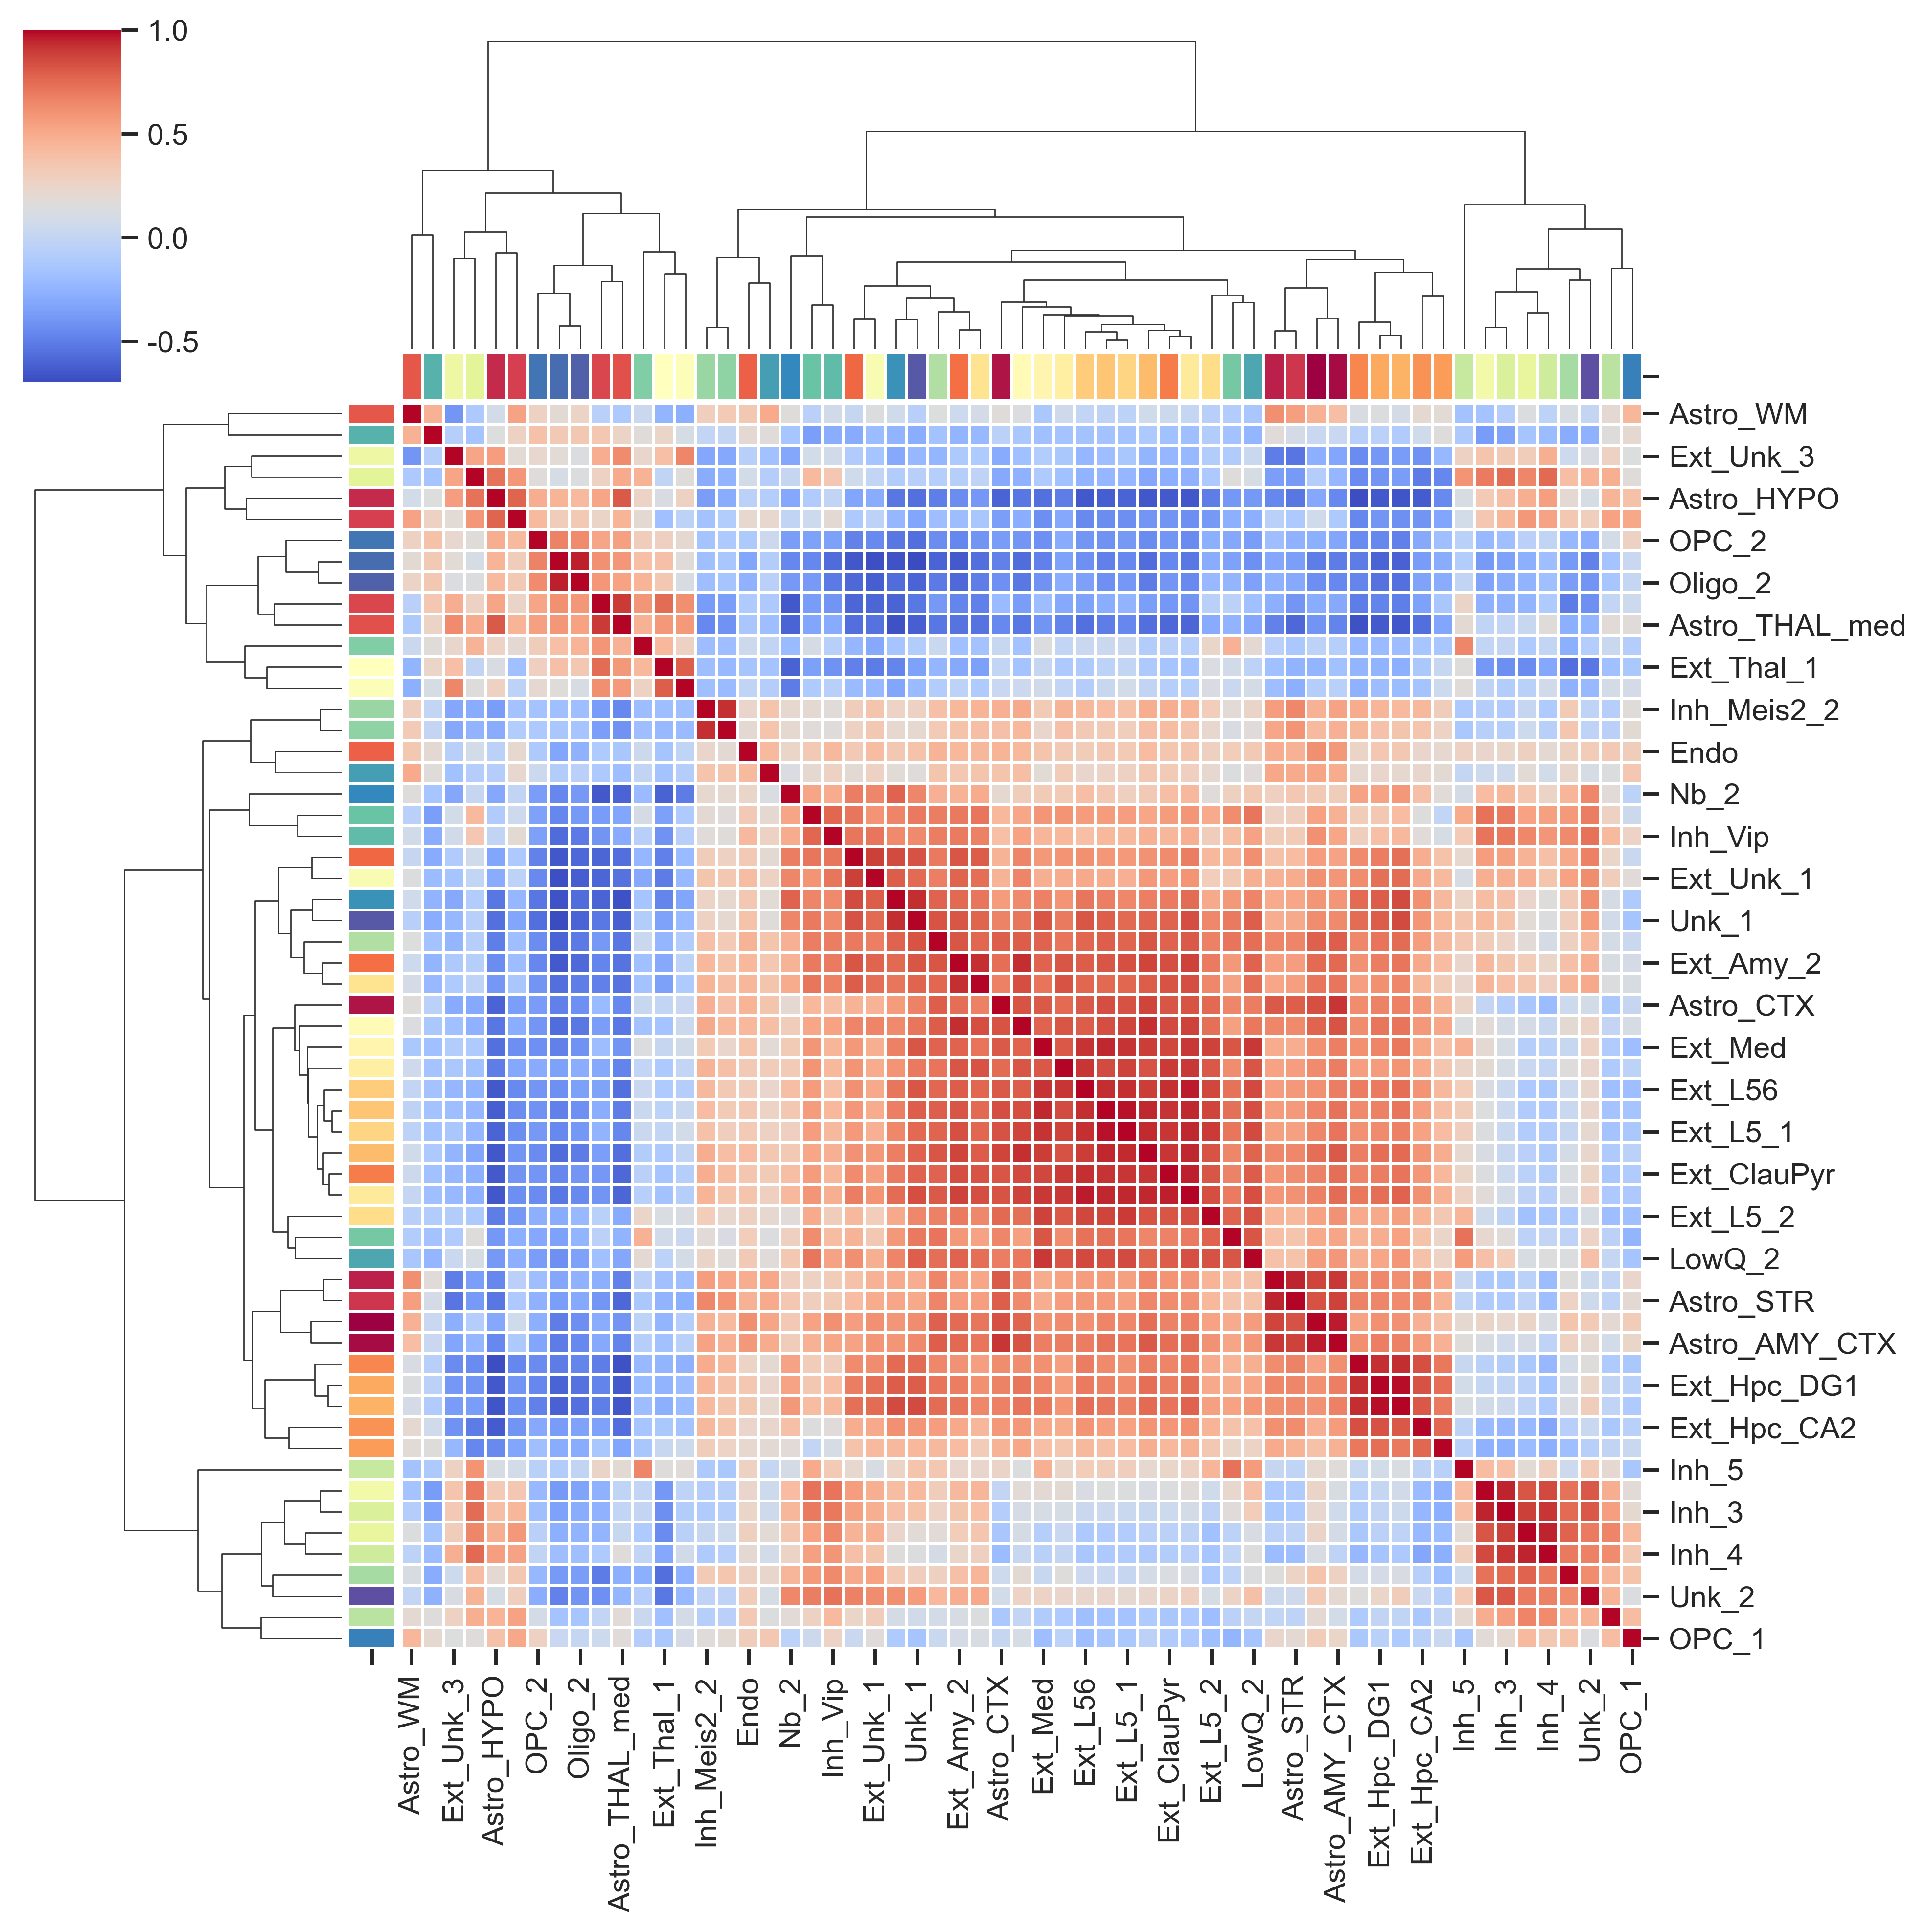

In [104]:
# row_c = dict(zip(list(df_Corr_CT2.columns.to_list()), plt.get_cmap('Spectral')(np.linspace(0, 1, 59))))
# index_c = dict(zip(list(df_Corr_CT2.columns.to_list()), plt.get_cmap('Spectral')(np.linspace(0, 1, 59))))
# # sns.set(style="ticks")
# # plt.figure(figsize=(13, 13))
# sns.clustermap(data=df_Corr_CT2,
# #                vmax=0.3,
#                cmap='coolwarm',
#                linewidths=0.75,
#                row_colors=pd.Series(df_Corr_CT2.columns.get_level_values(None), index=df_Corr_CT2.columns).map(row_c), 
#                col_colors=pd.Series(df_Corr_CT2.columns.get_level_values(None), index=df_Corr_CT2.columns).map(index_c),   
# #                dendrogram_ratio=0.15,# 图放大缩小
#               )

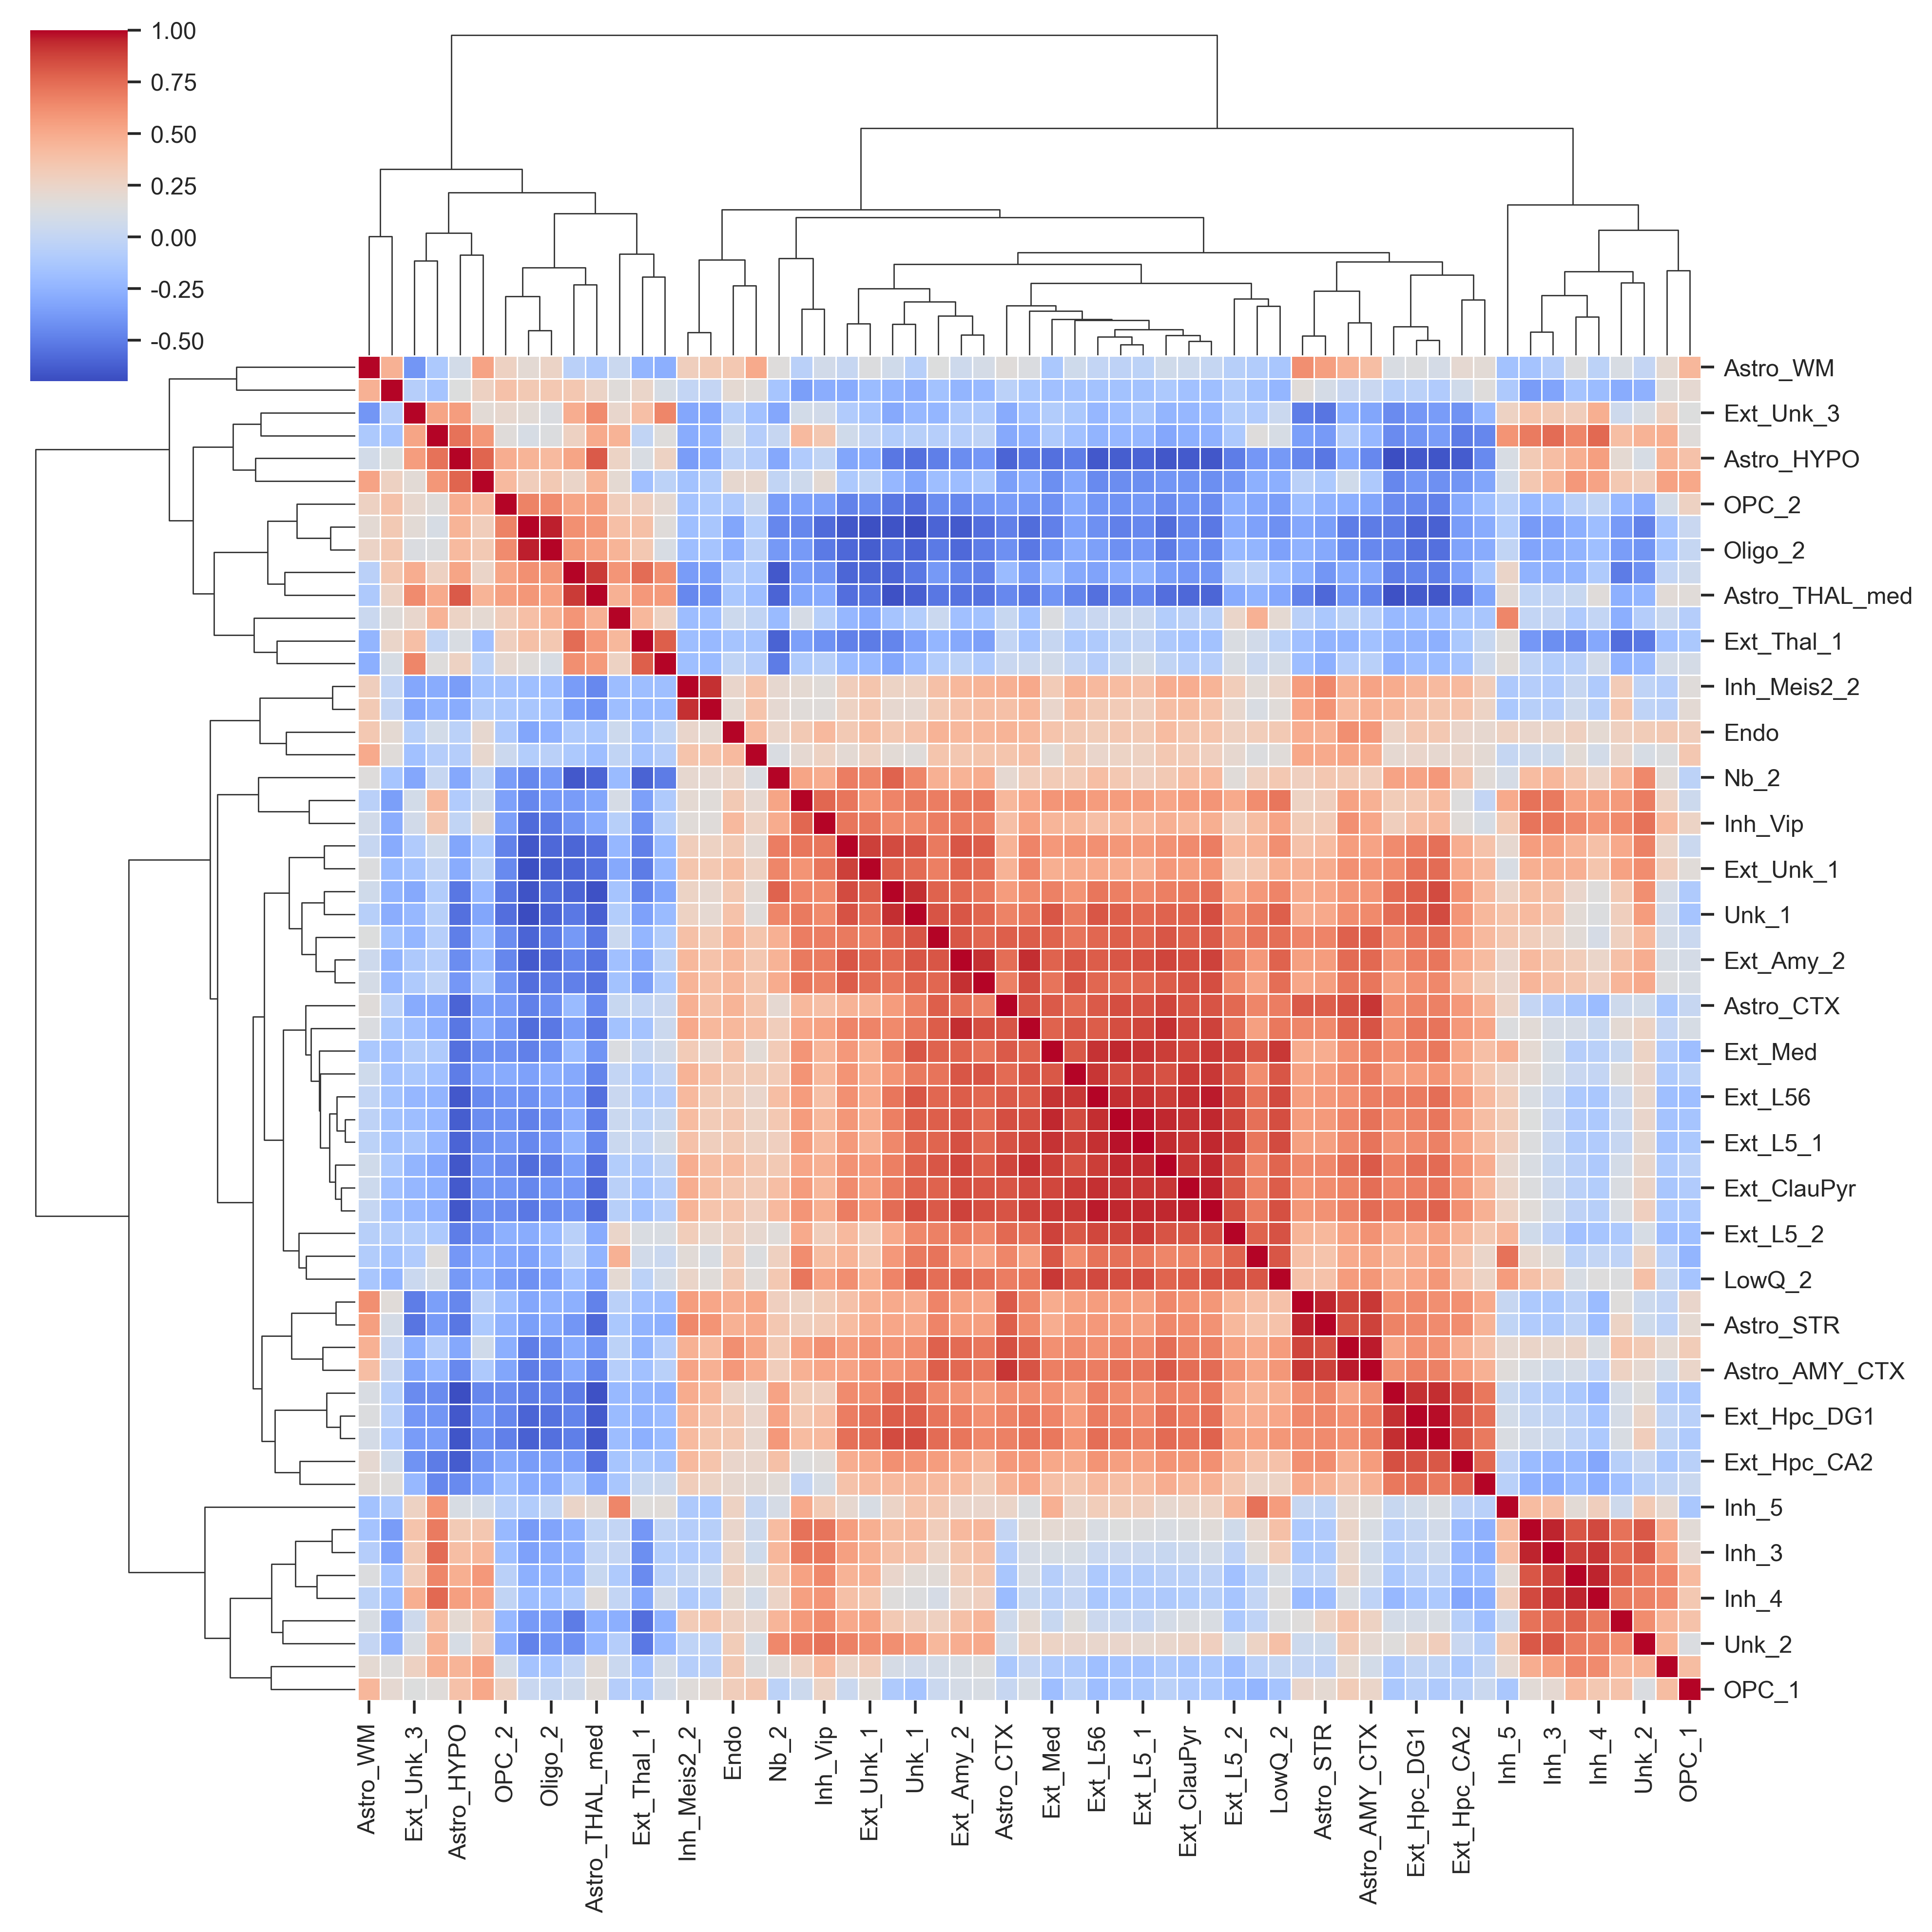

In [46]:
# sns.clustermap(df_Corr_CT2,
#                cmap='coolwarm',
#                square=True,  
#                linewidths=0.75,
#                cbar_kws={'shrink': 0.2, 'pad': 0.02,},  
#                row_colors=row_colors
#               )

In [47]:
import matplotlib.colors as mcolors

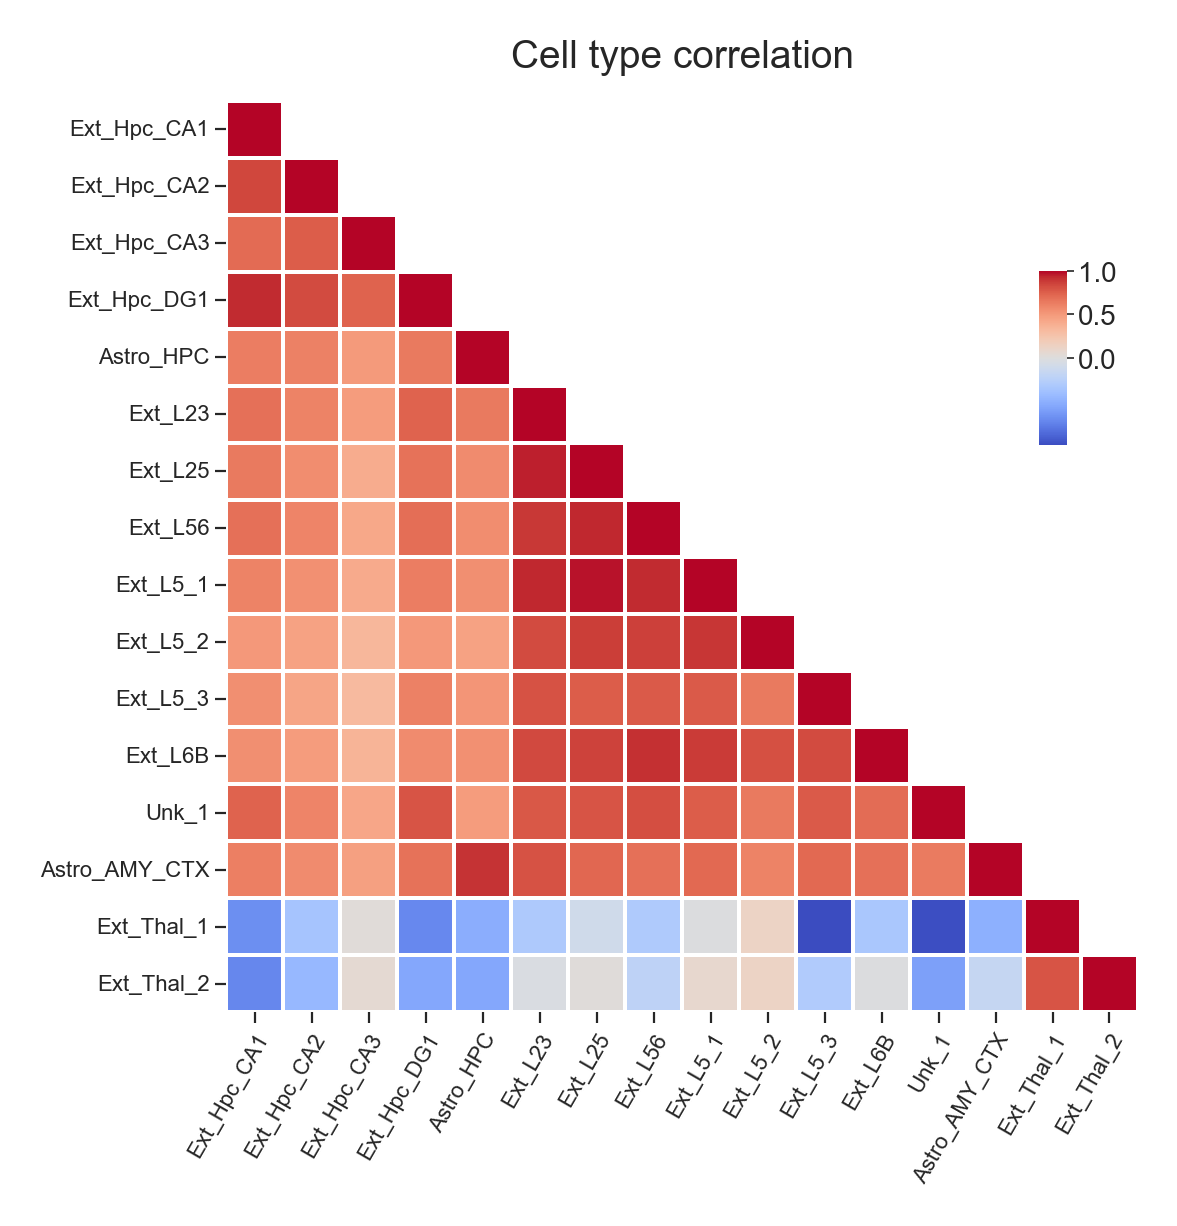

In [68]:
fig, ax_e = plt.subplots(figsize=(9*centimeter, 9*centimeter), dpi=400)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 在两种HUSL颜色之间制作不同的调色板。图的正负色彩范围为220、10，结果为真则返回matplotlib的colormap对象
cor_plot = sns.heatmap(
    df_1,  
    cmap='coolwarm',             #'coolwarm', vlag 
    mask=mask,
    square=True,  
    linewidths=0.4, 
    cbar_kws={'shrink': 0.5, 'pad': 0.02,},  
    ax=ax_e, 
    annot=False,  
    annot_kws={'fontsize': 7}, 
    norm = mcolors.TwoSlopeNorm(vmin=df_1.min().min(), vmax=1.0, vcenter=0),
    vmin = df_1.min().min()
) 

plt.xticks(rotation=60, ha='right', rotation_mode="anchor", fontsize=4)
plt.yticks(fontsize=4)
# cor_plot.set_xticks
cor_plot.tick_params(direction='out', length=2, width=0.4, pad=1, )

cbar_ax = fig.get_axes()[-1]
cbar_ax.remove()

# colorbar cax
cax = ax_e.figure.add_axes(mtransforms.Bbox.from_extents(ax_e.get_position().x1 - 0.07,
                              ax_e.get_position().y0+0.4,
                              ax_e.get_position().x1 - 0.07 + 0.02,
                              ax_e.get_position().y1-0.12), )# facecolor='none'
cbar = plt.colorbar(cor_plot.collections[-1], cax=cax, 
                    orientation='vertical',
#                     spacing='proportional',ticks=[-1.0, -0.2, 0, 0.5,1.0]
                    )
# cbar.ax.set_ylim(df_1.min().min(), 1)
cbar.ax.tick_params(direction='out', labelsize=5, length=1.3, width=0.3, pad=0.6,)
cbar.ax.set_frame_on(False)

# ax_e.set(xlabel="", ylabel="")
ax_e.set_title("Cell type correlation", fontsize=7)
plt.savefig('Fig5_celltype_correlation.pdf', bbox_inches='tight', format='pdf', dpi=400)

In [70]:
mask = np.zeros_like(df_Corr_CT2, dtype=bool)
mask[np.triu_indices_from(mask)] = True
row, col = np.diag_indices_from(mask)
mask[row,col] = False

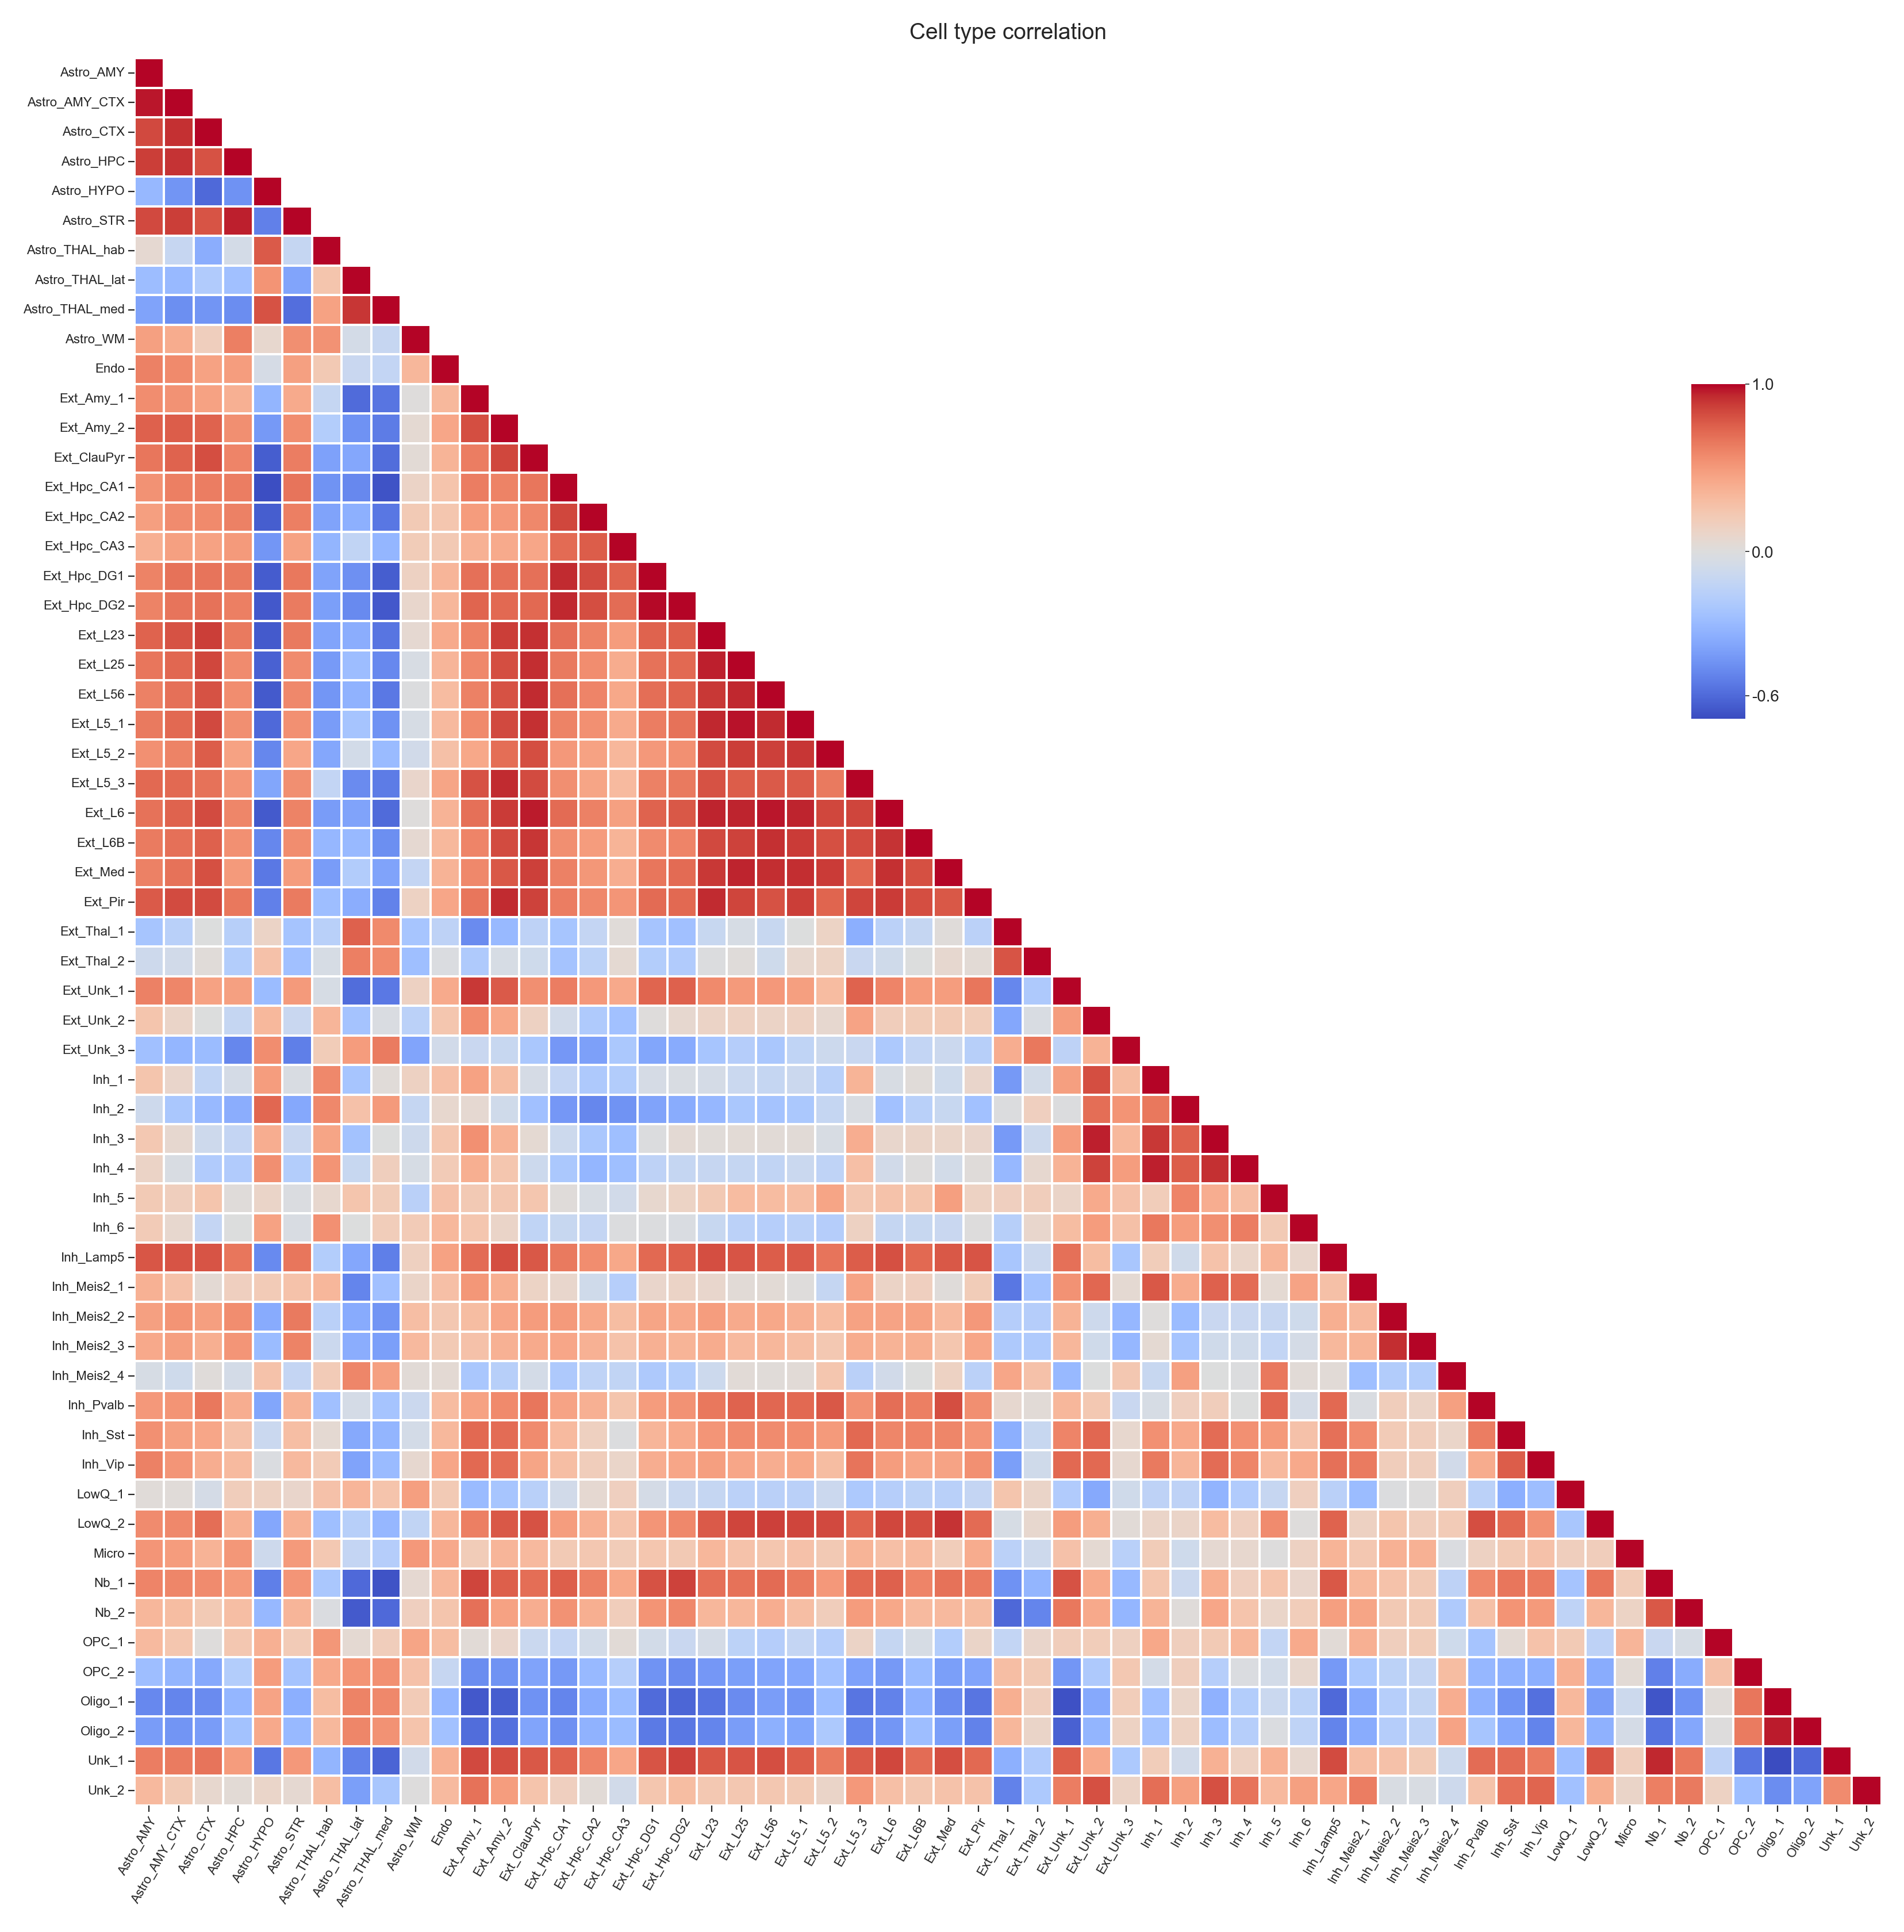

In [88]:
fig, ax_e = plt.subplots(figsize=(30*centimeter, 30*centimeter), dpi=400)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 在两种HUSL颜色之间制作不同的调色板。图的正负色彩范围为220、10，结果为真则返回matplotlib的colormap对象
cor_plot = sns.heatmap(
    df_Corr_CT2,  
    cmap='coolwarm',             #'coolwarm', vlag 
    mask=mask,
    square=True,  
    linewidths=0.4, 
    cbar_kws={'shrink': 0.5, 'pad': 0.02,},  
    ax=ax_e, 
    annot=False,  
    annot_kws={'fontsize': 7}, 
    norm = mcolors.TwoSlopeNorm(vmin=df_Corr_CT2.min().min(), vmax=1.0, vcenter=0),
    vmin = df_Corr_CT2.min().min()
) 

plt.xticks(rotation=60, ha='right', rotation_mode="anchor", fontsize=4)
plt.yticks(fontsize=4)
# cor_plot.set_xticks
cor_plot.tick_params(direction='out', length=2, width=0.4, pad=1, )

cbar_ax = fig.get_axes()[-1]
cbar_ax.remove()

# colorbar cax
cax = ax_e.figure.add_axes(mtransforms.Bbox.from_extents(ax_e.get_position().x1 - 0.07,
                              ax_e.get_position().y0+0.4,
                              ax_e.get_position().x1 - 0.07 + 0.02,
                              ax_e.get_position().y1-0.12), )# facecolor='none'
cbar = plt.colorbar(cor_plot.collections[-1], cax=cax, 
                    orientation='vertical',
#                     spacing='proportional',
                    ticks=[-0.6,  0, 1.0]
                    )
# cbar.ax.set_ylim(df_1.min().min(), 1)
cbar.ax.tick_params(direction='out', labelsize=5, length=1.3, width=0.3, pad=0.6,)
cbar.ax.set_frame_on(False)

# ax_e.set(xlabel="", ylabel="")
ax_e.set_title("Cell type correlation", fontsize=7)
plt.savefig('supp_Fig5_all_celltype_correlation.pdf', bbox_inches='tight', format='pdf', dpi=400)

# cell type - LR correlation

In [39]:
LR_to_view = ['Vegfa|Kdr', 'Vegfa|Flt1',  'Vegfa|Nrp1', 
              'Vegfb|Kdr', 'Vegfb|Flt1', 'Vegfb|Nrp1', 
              'Vegfc|Flt4', 'Vegfc|Kdr',
              'Vegfd|Flt4', 'Vegfd|Kdr', 
              'Sema3a|Nrp1', 'Sema7a|Itga1', 'Sema7a|Plxnc1', 
              'Sema3c|Nrp2', 
              'Sema6d|Kdr', 'Sema6d|Trem2',
              'Vtn|Itgb3', 'Vtn|Itgb1', 
              'Pdgfc|Flt4', 'Pdgfc|Pdgfra', ] 

In [81]:
CT_to_view = ['Astro_AMY', 'Astro_AMY_CTX', 'Astro_CTX', 'Astro_HPC', 'Astro_HYPO',
       'Astro_STR', 'Astro_THAL_hab', 'Astro_THAL_lat', 'Astro_THAL_med',
       'Astro_WM', 'Endo', 'Ext_Amy_1', 'Ext_Amy_2', 'Ext_ClauPyr',
       'Ext_Hpc_CA1', 'Ext_Hpc_CA2', 'Ext_Hpc_CA3', 'Ext_Hpc_DG1',
       'Ext_Hpc_DG2', 'Ext_L23', 'Ext_L25', 'Ext_L56', 'Ext_L5_1', 'Ext_L5_2',
       'Ext_L5_3', 'Ext_L6', 'Ext_L6B', 'Ext_Med', 'Ext_Pir', 'Ext_Thal_1',
       'Ext_Thal_2', 'Inh_1', 'Inh_2',
       'Inh_3', 'Inh_4', 'Inh_5', 'Inh_6', 'Inh_Lamp5', 'Inh_Meis2_1',
       'Inh_Meis2_2', 'Inh_Meis2_3', 'Inh_Meis2_4', 'Inh_Pvalb', 'Inh_Sst',
       'Inh_Vip', 'LowQ_1', 'LowQ_2', 'Micro', 'Nb_1', 'Nb_2', 'OPC_1',
       'OPC_2', 'Oligo_1', 'Oligo_2', ]

In [8]:
# LR_to_view = ['Vegfa|Kdr', 'Vegfa|Flt1',  'Vegfa|Nrp1', 'Vegfa|Nrp2', 'Vegfa|Grin2b', 'Vegfa|Ephb2',
#               'Vegfb|Kdr', 'Vegfb|Flt1', 'Vegfb|Nrp1', 'Vegfb|Adrb2', 
#               'Vegfc|Flt4', 'Vegfc|Kdr',
#               'Vegfd|Flt4', 'Vegfd|Kdr', 
#               'Sema3a|Nrp1', 'Sema7a|Itga1', 'Sema7a|Plxnc1', 'Sema3a|Plxna1', 'Sema3a|Plxna3',
#               'Sema3c|Nrp2', 
#               'Sema6d|Kdr', 'Sema6d|Trem2',
#               'Sema3e|Plxnd1', 
#               'Sema3f|Nrp2',
#               'Vtn|Itgb3', 'Vtn|Itgb1', 
#               'Pdgfc|Flt4', 'Pdgfc|Pdgfra', 
#               'Angpt1|Tek',
#               'Il16|Grin2b',] 


# # ['Dlk1|Notch1', 'Efna5|Epha7', 'Efna3|Epha7', 'Nrg1|Erbb4', 'Efna5|Epha4', 
# # 'Nrg1|Neto2', 'Cck|Cckbr', 'Vegfa|Grin2b', 'Il16|Grin2b', 'Sema3a|Plxna1']

In [54]:
# spot_LR = adata.obsm['spot_lr_score'][LR_to_view].values
spot_LR = adata.obsm['spot_lr_score']

In [56]:
# spot_CT_1 = adata.obsm['cell_types'].drop(columns=['Ext_Unk_1', 'Ext_Unk_2', 'Ext_Unk_3', 'Unk_1', 'Unk_2'],)
spot_CT = adata.obsm['cell_types']

In [42]:
# spot_CT = spot_CT_1.values

In [63]:
# spot_CT = adata.obsm['cell_types'].values
n_spot = spot_CT.shape[0]
n_CT = spot_CT.shape[1]
n_LR = spot_LR.shape[1]
Corr_CT_LR = np.zeros((n_CT, n_LR))
pval_CT_LR = np.zeros((n_CT, n_LR))
for i in range(n_CT):
    for j in range(n_LR):
        Corr_CT_LR[i,j], pval_CT_LR[i,j] = scipy.stats.spearmanr(spot_CT.iloc[:,i], spot_LR.iloc[:,j])

In [73]:
df_Corr_CT_LR = pd.DataFrame(Corr_CT_LR)
df_Corr_CT_LR.columns = spot_LR.columns
df_Corr_CT_LR.index = spot_CT.columns

In [74]:
df_Corr_CT_LR

Jag2|Notch1  Dll1|Notch1  Jag1|Notch1  Dll4|Notch1  \
Astro_AMY          0.277858     0.095734     0.104254     0.172487   
Astro_AMY_CTX      0.259176     0.092222     0.105942     0.173874   
Astro_CTX          0.222952     0.063981     0.089539     0.185121   
Astro_HPC          0.183817     0.084994     0.068832     0.121433   
Astro_HYPO        -0.085937    -0.000999     0.005883    -0.096865   
Astro_STR          0.196102     0.093612     0.084813     0.114111   
Astro_THAL_hab     0.026469     0.039254     0.023057    -0.014898   
Astro_THAL_lat    -0.217991    -0.077819    -0.050351    -0.078756   
Astro_THAL_med    -0.189894    -0.058585    -0.027821    -0.102564   
Astro_WM           0.057937     0.048145     0.018477     0.030257   
Endo               0.201627     0.066002     0.108892     0.137283   
Ext_Amy_1          0.242940     0.048138     0.047872     0.132452   
Ext_Amy_2          0.284785     0.073020     0.100250     0.205479   
Ext_ClauPyr        0.221448     0.034431     0.068818     0.177929   
Ext_Hpc_CA1        0.116113     0.028262    -0.004462     0.059840   
Ext_Hpc_CA2        0.088845     0.026736     0.011251     0.086380   
Ext_Hpc_CA3        0.031727     0.002684     0.004018     0.058762   
Ext_Hpc_DG1        0.136762     0.020489     0.001434     0.102473   
Ext_Hpc_DG2        0.149444     0.018696     0.000948     0.107173   
Ext_L23            0.232143     0.053597     0.067179     0.209691   
Ext_L25            0.202490     0.032203     0.050846     0.181063   
Ext_L56            0.181864     0.006933     0.035677     0.157838   
Ext_L5_1           0.204363     0.033965     0.059435     0.184945   
Ext_L5_2           0.165545     0.014818     0.031432     0.167189   
Ext_L5_3           0.288915     0.072286     0.103345     0.194404   
Ext_L6             0.218097     0.026986     0.055406     0.178795   
Ext_L6B            0.208940     0.025700     0.082660     0.163700   
Ext_Med            0.186291     0.009699     0.036359     0.157933   
Ext_Pir            0.249247     0.071836     0.099916     0.213254   
Ext_Thal_1        -0.205542    -0.076282    -0.035593    -0.058787   
Ext_Thal_2        -0.091353    -0.048828     0.031554    -0.002820   
Ext_Unk_1          0.249688     0.062533     0.063815     0.137398   
Ext_Unk_2          0.223559     0.063966     0.065562     0.086753   
Ext_Unk_3         -0.049917    -0.032381     0.041506    -0.029114   
Inh_1              0.181481     0.080191     0.077522     0.050639   
Inh_2              0.061652     0.029250     0.010584    -0.011381   
Inh_3              0.202702     0.059244     0.049321     0.057984   
Inh_4              0.143581     0.056588     0.062557     0.032081   
Inh_5              0.087033    -0.007725    -0.014754     0.077004   
Inh_6              0.065567     0.033449     0.035264     0.018464   
Inh_Lamp5          0.265219     0.053107     0.054719     0.175808   
Inh_Meis2_1        0.233891     0.127786     0.125805     0.050929   
Inh_Meis2_2        0.147814     0.114706     0.103349     0.066465   
Inh_Meis2_3        0.126699     0.106645     0.093925     0.045497   
Inh_Meis2_4       -0.074533    -0.048116    -0.056519    -0.025535   
Inh_Pvalb          0.163246     0.005778    -0.004951     0.128715   
Inh_Sst            0.278103     0.066865     0.064563     0.138164   
Inh_Vip            0.289953     0.084615     0.092636     0.147712   
LowQ_1            -0.137904    -0.048107    -0.034423    -0.037048   
LowQ_2             0.195874     0.013969     0.032745     0.147334   
Micro              0.151431     0.060199     0.064796     0.081477   
Nb_1               0.227329     0.027239     0.005576     0.131235   
Nb_2               0.181698     0.043880     0.011518     0.067063   
OPC_1              0.091355     0.080440     0.099396     0.047439   
OPC_2             -0.160126    -0.060923    -0.021809    -0.078663   
Oligo_1           -0.234477    -0.075182    -0.063831    -0.147962   
Oligo_2           -0.21112

In [90]:
df_pval_CT_LR = pd.DataFrame(pval_CT_LR)
df_pval_CT_LR.columns = spot_LR.columns
df_pval_CT_LR.index = spot_CT.columns

In [91]:
df_Corr_view = df_Corr_CT_LR.loc[CT_to_view, LR_to_view]
df_pval_view = df_pval_CT_LR.loc[CT_to_view, LR_to_view]

In [93]:
df_Corr_view.shape, df_pval_view.shape

((54, 20), (54, 20))

In [94]:
def expand_grid(x, y):
    xG, yG = np.meshgrid(x, y) # create the actual grid
    xG = xG.flatten() # make the grid 1d
    yG = yG.flatten() # same
    return pd.DataFrame({'Cell type':xG, 'L_R':yG}) # return a dataframe

In [95]:
x_y_scatter_CT_LR = expand_grid(CT_to_view, LR_to_view)
x_y_scatter_CT_LR

Cell type           L_R
0         Astro_AMY     Vegfa|Kdr
1     Astro_AMY_CTX     Vegfa|Kdr
2         Astro_CTX     Vegfa|Kdr
3         Astro_HPC     Vegfa|Kdr
4        Astro_HYPO     Vegfa|Kdr
...             ...           ...
1075           Nb_2  Pdgfc|Pdgfra
1076          OPC_1  Pdgfc|Pdgfra
1077          OPC_2  Pdgfc|Pdgfra
1078        Oligo_1  Pdgfc|Pdgfra
1079        Oligo_2  Pdgfc|Pdgfra

[1080 rows x 2 columns]

In [97]:
x_y_scatter_CT_LR['correlation'] = df_Corr_view.values.reshape(df_Corr_view.shape[0]*df_Corr_view.shape[1],)
x_y_scatter_CT_LR['p values'] = df_pval_view.values.reshape(df_Corr_view.shape[0]*df_Corr_view.shape[1],)

In [98]:
x_y_scatter_CT_LR['p values'].max()

0.9921716245940212

In [99]:
(x_y_scatter_CT_LR['p values']<0.05).sum()

985

In [100]:
x_y_scatter_CT_LR['padj'] = x_y_scatter_CT_LR['p values']
x_y_scatter_CT_LR['padj'][x_y_scatter_CT_LR['p values']>0.05] = 0
x_y_scatter_CT_LR['padj'][x_y_scatter_CT_LR['p values']==0] = -np.log10(np.sort(x_y_scatter_CT_LR['p values'][x_y_scatter_CT_LR['p values']!=0].values)[0])
x_y_scatter_CT_LR['padj'][x_y_scatter_CT_LR['padj']<0.05] = -np.log10(x_y_scatter_CT_LR['p values'][x_y_scatter_CT_LR['padj']<0.05].values)

/tmp/ipykernel_20809/3218912370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_y_scatter_CT_LR['padj'][x_y_scatter_CT_LR['p values']>0.05] = 0
/tmp/ipykernel_20809/3218912370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_y_scatter_CT_LR['padj'][x_y_scatter_CT_LR['p values']==0] = -np.log10(np.sort(x_y_scatter_CT_LR['p values'][x_y_scatter_CT_LR['p values']!=0].values)[0])
/tmp/ipykernel_20809/3218912370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [101]:
x_y_scatter_CT_LR['padj'].max()

302.1107758199709

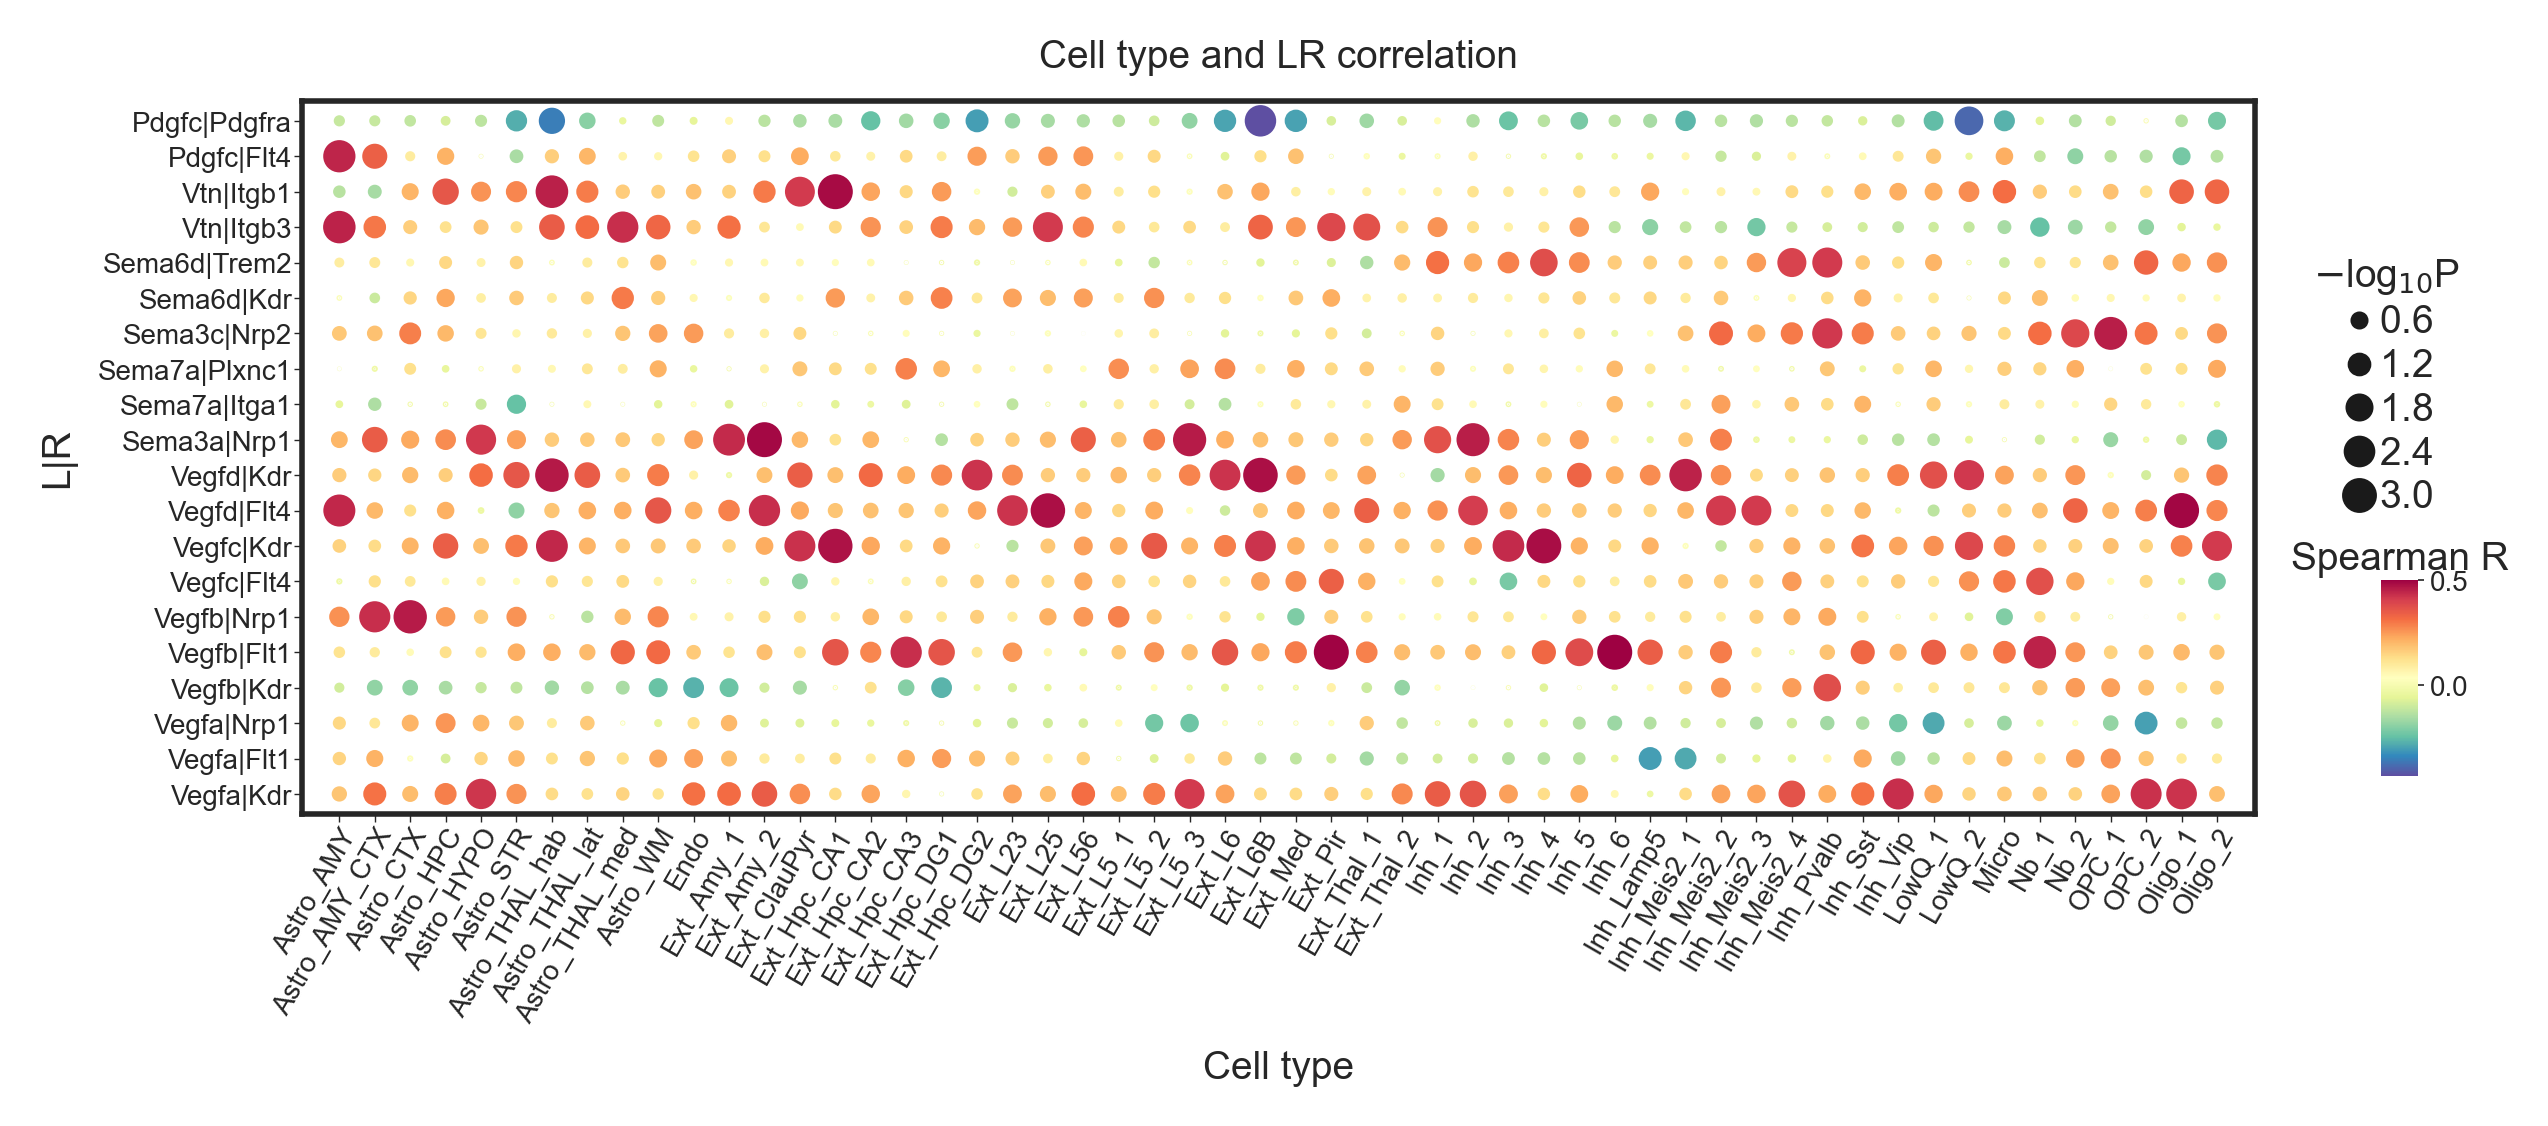

In [103]:
fig = plt.figure(figsize=(16*centimeter, 10*centimeter), dpi=400)
ax = plt.subplot(aspect = 'equal', )#
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
# (left=0.1, right=0.9, top=0.9, bottom=0.1)
scatter_LR_CT = ax.scatter(
    x = x_y_scatter_CT_LR['Cell type'].values,
    y = x_y_scatter_CT_LR['L_R'].values,
    c = x_y_scatter_CT_LR['correlation'].values,
#     c = np.log(x_y_scatter['expression'].values),
    s = x_y_scatter_CT_LR['padj'].values*0.01*10,
    cmap = 'Spectral_r'  #rainbow
)

ax.tick_params(direction='out', labelsize=5, length=1.5, width=0.25, 
               top=False, right=False, left=True, pad=0.2,
               grid_alpha=0, labelright=False, labelleft=True)
plt.xticks(rotation=60, ha='right', rotation_mode="anchor", fontsize=5)


ax.set_title("Cell type and LR correlation", fontsize=7)
plt.xlabel('Cell type', fontsize=7)
plt.ylabel('L|R', fontsize=7)


# colorbar cax
cax = ax.figure.add_axes(mtransforms.Bbox.from_extents(ax.get_position().x1 + 0.05,
                              ax.get_position().y0+0.02,
                              ax.get_position().x1 + 0.05 + 0.015,
                              ax.get_position().y1-0.3), )# facecolor='none'
plt.colorbar(scatter_LR_CT, cax=cax, orientation='vertical')
cax.tick_params(direction='out', labelsize=5, length=1, width=0.3, pad=1, )
cax.set_title("Spearman R", fontsize=7, pad=2)
cax.set_frame_on(False)


# legend
handles, labels = scatter_LR_CT.legend_elements(prop="sizes", num=5, func=lambda x: x/10)   #
legend2 = ax.legend(handles, labels, loc="center left", bbox_to_anchor=[1.03, 0.6], 
                    title="$-$log$_{10}$P", title_fontsize=7, markerscale=1.0,
                    fontsize=7, ncols=1, frameon=False, )
# ax.set_aspect('equal','box')
plt.rcParams['axes.unicode_minus'] = True 
# sns.despine()
ax.margins(0.02,0.03)
# ax.tight_layout()
# plt.savefig('Fig6_f.pdf', bbox_inches='tight', format='pdf', dpi=400)